## Background

This is a database from a food delivery company. The objective of the team is to build a predictive model that will help budget allocation to the customers who are likely to spend more money. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone. During the following months, customers who bought the offer were properly labeled. 

## Business Question

The key question is about the relationship between customer's background and the amount they spend on the food delivery.

Specifically, we would like to identify which factors in customer's background have the greatest impact on the amount spent and accordingly describe how does the customers that spend most look like. 

By knowing the features, the marketing will be able to allocate more budget to marketing the kind of customers, in order to help increase the gross sales.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
print(os.getcwd())

C:\Users\lytoy\Downloads\Project 3


# DATA EXPLORATION

In [2]:
# import data
df = pd.read_csv(r'C:\Users\lytoy\Downloads\Project 3\ml_project1_data.csv')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
# check all data columns to see if it is enough for analysis
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
# Delete the info as it is not related much to customer backgrouds
del_col = ['ID', 'Dt_Customer', 'Recency', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df.drop(del_col, axis=1, inplace=True)
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2235       709         43              182               42  ...   
2236       406          0               30                0  ...   
2237       908         48              217               32  ...   
2238       428         30              214               80  ...   
2239        84          3               61                2  ...   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  
0                0             0             0  
1                0             0             0  
2                0             0             0  
3                0             0             0  
4                0             0             0  
...            ...           ...           ...  
2235             0             0             0  
2236             0             1             0  
2237             0             0             0  
2238             0             0             0  
2239             0             0             0  

[2240 rows x 22 columns]

In [5]:
# Calculate the total number of offer acceptance and combine them into a descriptive variable
accept_col = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
df['Accept_Overall'] = df[accept_col].sum(axis=1)
df.drop(accept_col, axis=1, inplace=True)
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Accept_Overall  
0                     4                  7               0  
1                     2                  5               0  
2                    10                  4               0  
3                     4                  6               0  
4                     6                  5               0  
...                 ...                ...             ...  
2235                  4                  5               0  
2236                  5                  7               1  
2237                 13                  6               1  
2238                 10                  3               0  
2239                  4                  7               0  

[2240 rows x 18 columns]

In [6]:
# transform them into numbers so that they can be used in the model
unique_value1 = df['Education'].unique()
unique_value2 = df['Marital_Status'].unique()
print(unique_value1, unique_value2)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [7]:
education_mapping = {
    'Basic': 1,
    'Graduation': 2,
    '2n Cycle': 3,
    'Master': 3,
    'PhD': 4
}

df['Education'] = df['Education'].replace(education_mapping)

In [8]:
# simplify the martital status into two categories
Marital_Status_mapping = {
    'Single': 1,
    'Together': 2,
    'Married': 2,
    'Divorced': 1, 
    'Widow': 1, 
    'Alone': 1, 
    'Absurd': 1, 
    'YOLO': 1,    
}

df['Marital_Status'] = df['Marital_Status'].replace(Marital_Status_mapping)
df

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957          2               1  58138.0        0         0   
1           1954          2               1  46344.0        1         1   
2           1965          2               2  71613.0        0         0   
3           1984          2               2  26646.0        1         0   
4           1981          4               2  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2235        1967          2               2  61223.0        0         1   
2236        1946          4               2  64014.0        2         1   
2237        1981          2               1  56981.0        0         0   
2238        1956          3               2  69245.0        0         1   
2239        1954          4               2  52869.0        1         1   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Accept_Overall  
0                     4                  7               0  
1                     2                  5               0  
2                    10                  4               0  
3                     4                  6               0  
4                     6                  5               0  
...                 ...                ...             ...  
2235                  4                  5               0  
2236                  5                  7               1  
2237                 13                  6               1  
2238                 10                  3               0  
2239                  4                  7               0  

[2240 rows x 18 columns]

In [9]:
df['Mnt_All'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957          2               1  58138.0        0         0   
1           1954          2               1  46344.0        1         1   
2           1965          2               2  71613.0        0         0   
3           1984          2               2  26646.0        1         0   
4           1981          4               2  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2235        1967          2               2  61223.0        0         1   
2236        1946          4               2  64014.0        2         1   
2237        1981          2               1  56981.0        0         0   
2238        1956          3               2  69245.0        0         1   
2239        1954          4               2  52869.0        1         1   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Accept_Overall  Mnt_All  
0                     4                  7               0     1617  
1                     2                  5               0       27  
2                    10                  4               0      776  
3                     4                  6               0       53  
4                     6                  5               0      422  
...                 ...                ...             ...      ...  
2235                  4                  5               0     1341  
2236                  5                  7               1      444  
2237                 13                  6               1     1241  
2238                 10                  3               0      843  
2239                  4                  7               0      172  

[2240 rows x 19 columns]

In [10]:
# check nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   int64  
 2   Marital_Status       2240 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [11]:
# have basic understanding of the data
df.describe()

Year_Birth    Education  Marital_Status         Income      Kidhome  \
count  2240.000000  2240.000000     2240.000000    2216.000000  2240.000000   
mean   1968.805804     2.665625        1.644643   52247.251354     0.444196   
std      11.984069     0.839658        0.478728   25173.076661     0.538398   
min    1893.000000     1.000000        1.000000    1730.000000     0.000000   
25%    1959.000000     2.000000        1.000000   35303.000000     0.000000   
50%    1970.000000     2.000000        2.000000   51381.500000     0.000000   
75%    1977.000000     3.000000        2.000000   68522.000000     1.000000   
max    1996.000000     4.000000        2.000000  666666.000000     2.000000   

          Teenhome     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean      0.506250   303.935714    26.302232       166.950000   
std       0.544538   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%       0.000000    23.750000     1.000000        16.000000   
50%       0.000000   173.500000     8.000000        67.000000   
75%       1.000000   504.250000    33.000000       232.000000   
max       2.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  Accept_Overall      Mnt_All  
count        2240.000000     2240.000000  2240.000000  
mean            5.316518        0.297768   605.798214  
std             2.426645        0.678381   602.249288  
min             0.000000        0.000000     5.000000  
25%             3.000000        0.000000    68.750000  
50%             6.000000        0.000000   396.000000  
75%             7.000000        0.000000  1045.500000  
max            20.000000        4.000000  2525.000000

In [12]:
# fill nulls under 'Income' with income median
df['Income'] = df['Income'].fillna(51381.5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   int64  
 2   Marital_Status       2240 non-null   int64  
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [13]:
len(df.columns)

19

# DATA CHECK BEFORE MODEL BUILDING

In [14]:
#Test for the linearity assumption

#Visualize the relationship between the preditors and the target using scatterplot 

columns_to_plot = [col for col in df.columns if col != 'Mnt_All']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 15))  # 6 rows * 3 columns = 18 plots

for idx, column in enumerate(columns_to_plot):
    ax = axes[idx//3, idx%3]
    
    ax.scatter(df[column], df['Mnt_All'], alpha=0.5)
    
    ax.set_title(f'Relationship between {column} and Total Amount Spent')
    ax.set_xlabel(column)
    ax.set_ylabel('Mnt_All')

if len(columns_to_plot) < 18:
    for idx in range(len(columns_to_plot), 18):
        axes[idx//3, idx%3].axis('off')

plt.tight_layout()
plt.show()


In [15]:
# Plot histograms with kde overlay to check the distribution of the predictors

# Adjust the number of rows and columns based on 18 plots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))  # 6 rows * 3 columns = 18 plots

for i, column in enumerate(columns_to_plot):
    ax = axes[i//3, i%3]
    df[column].plot.hist(density=True, label=column+' histogram', ax=ax)
    df[column].plot.kde(label=column+' kde', ax=ax)
    ax.legend()
    ax.set_title(column)

# Remove unused subplots if there are fewer columns to plot than spaces for 18 plots
if len(columns_to_plot) < 18:  
    for j in range(len(columns_to_plot), 18):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


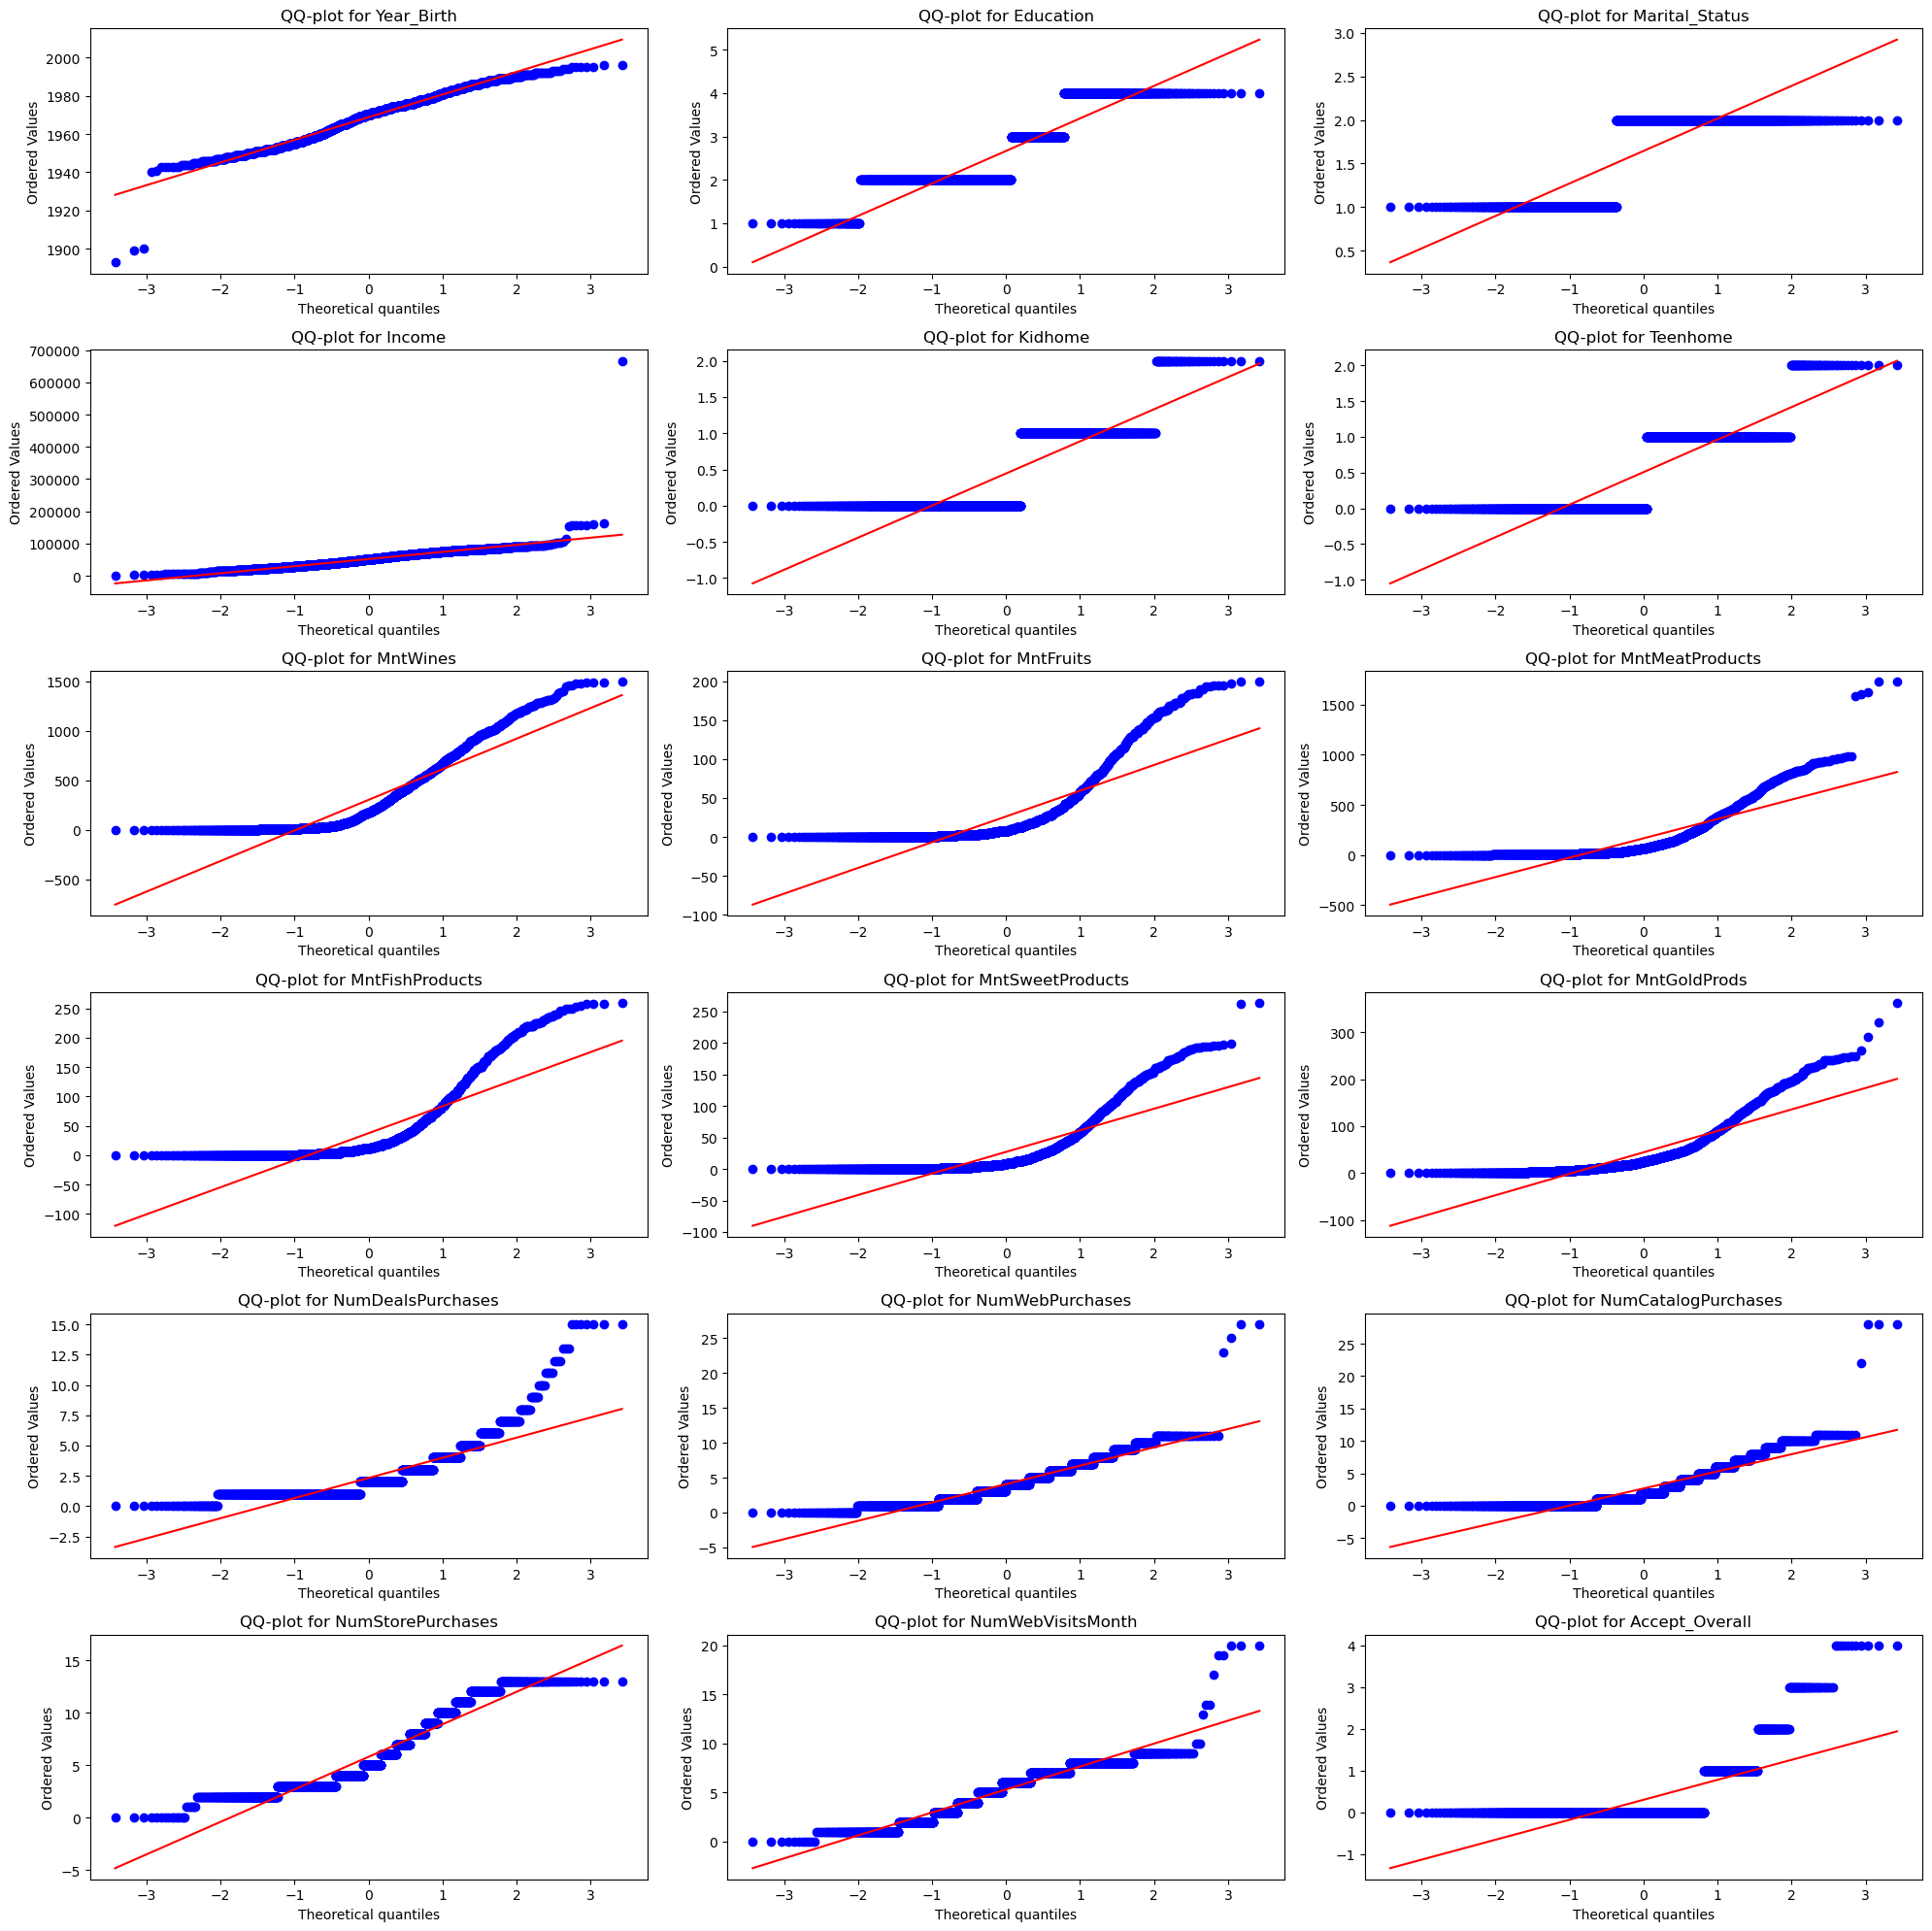

In [16]:
# Check the normality assumptions through QQ-plots

from scipy.stats import probplot

# Adjust the number of rows and columns based on 18 plots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))  # 6 rows * 3 columns = 18 plots

for idx, column in enumerate(columns_to_plot):
    ax = axes[idx // 3, idx % 3]  
    probplot(df[column], plot=ax)
    ax.set_title(f'QQ-plot for {column}')

# Hide unused subplots if there are fewer columns to plot than spaces for 18 plots
if len(columns_to_plot) < 18:  
    for idx in range(len(columns_to_plot), 18):
        axes[idx//3, idx%3].axis('off')
        
plt.tight_layout()
plt.show()


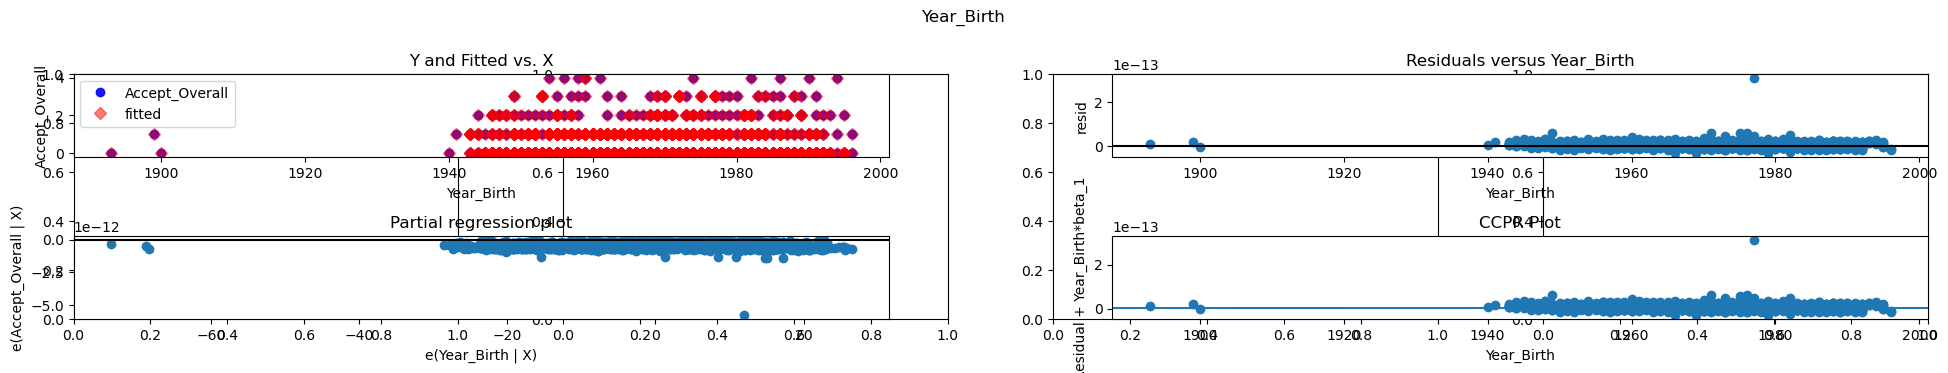

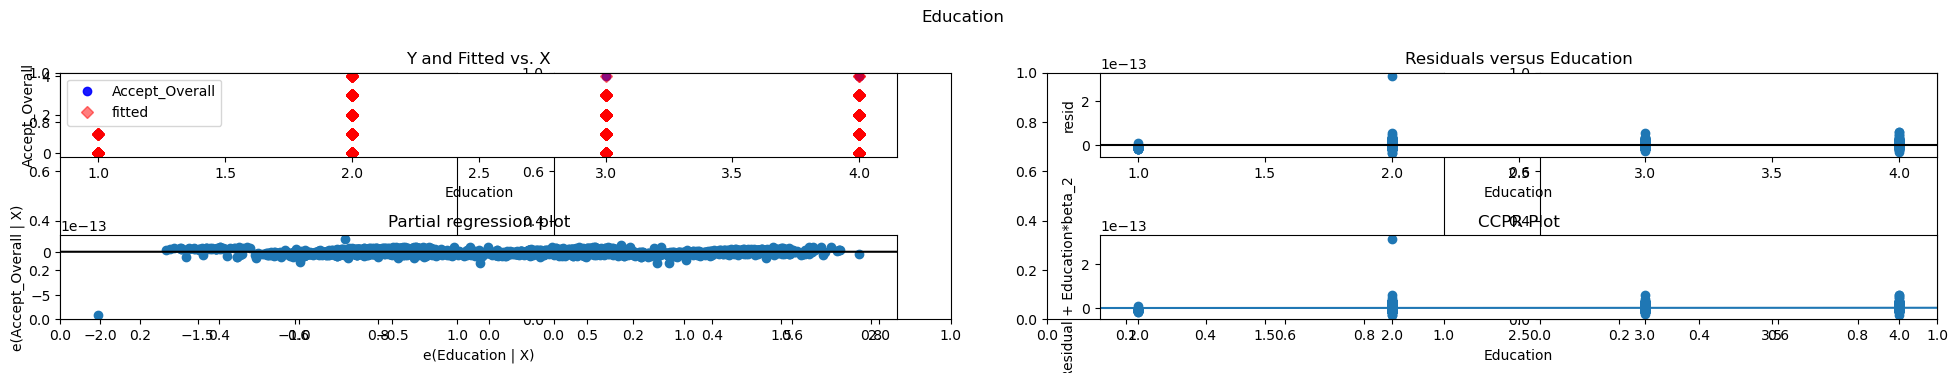

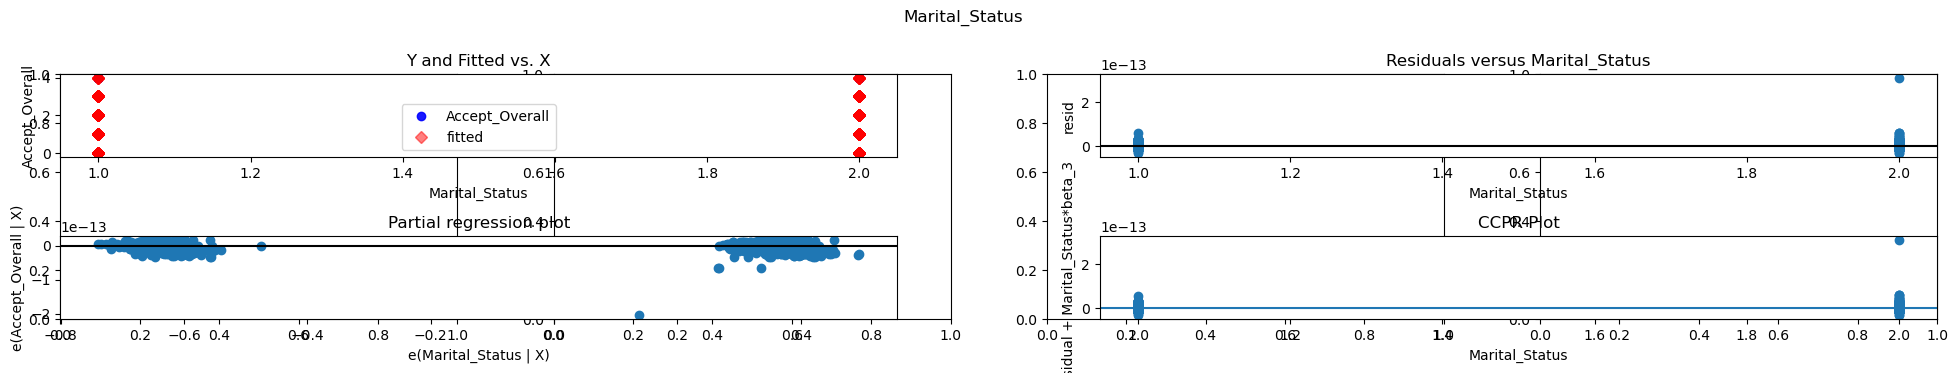

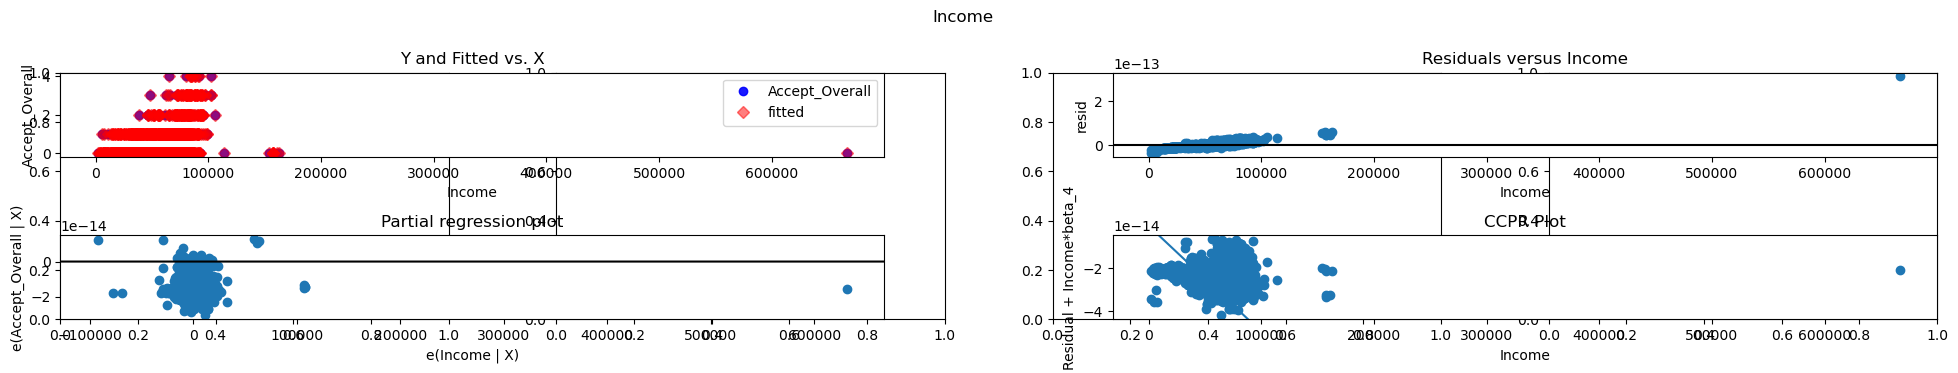

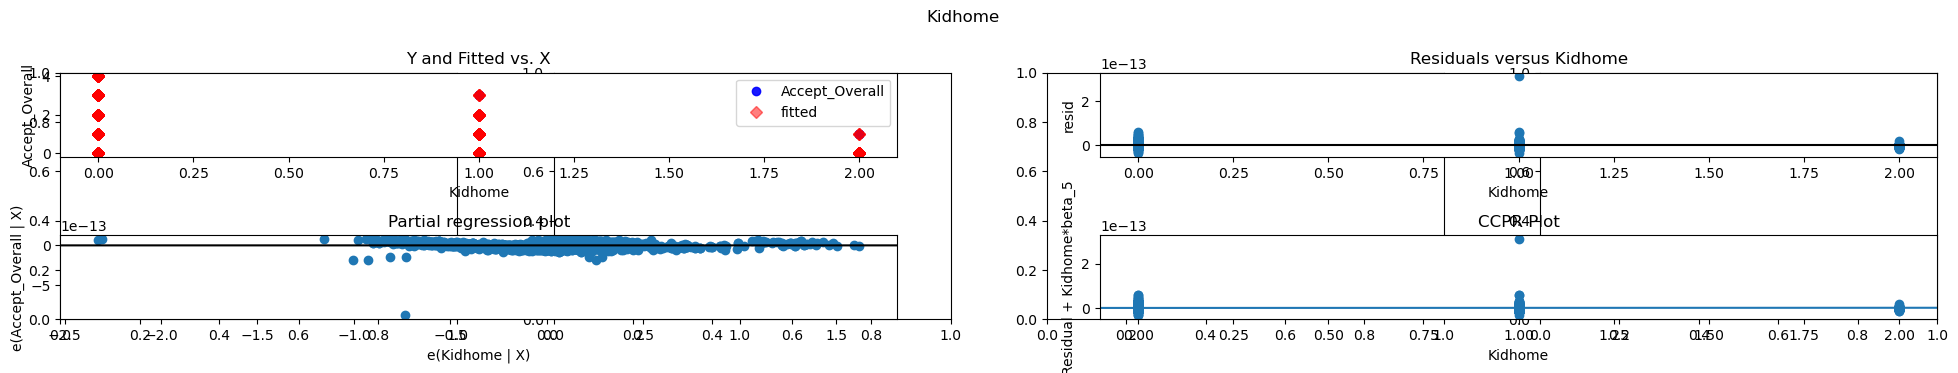

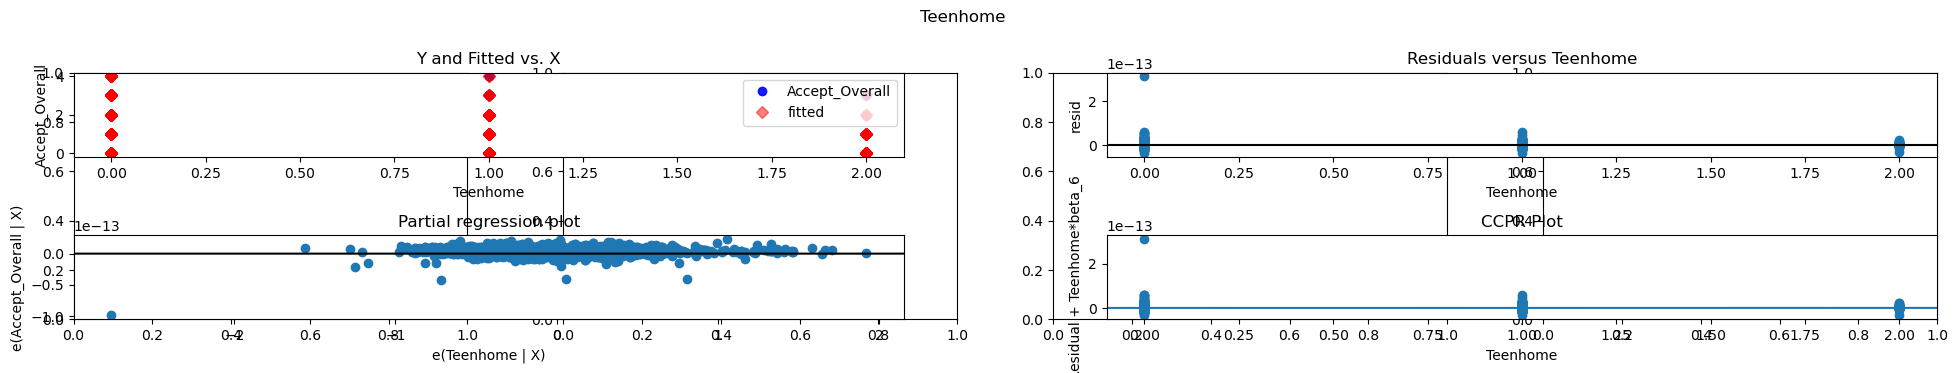

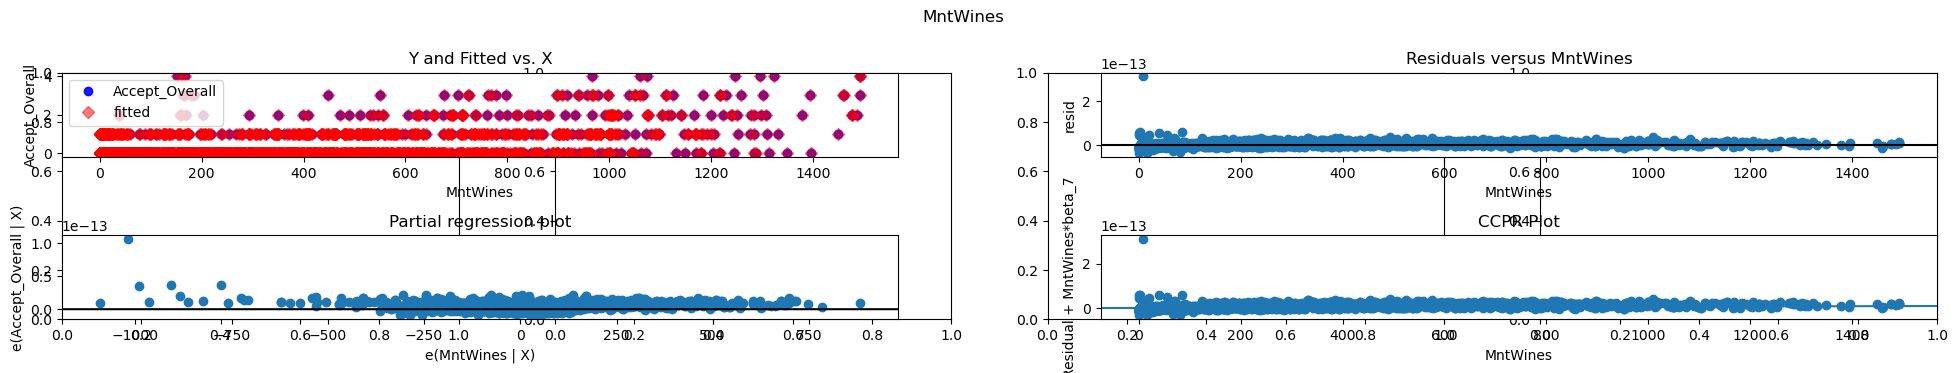

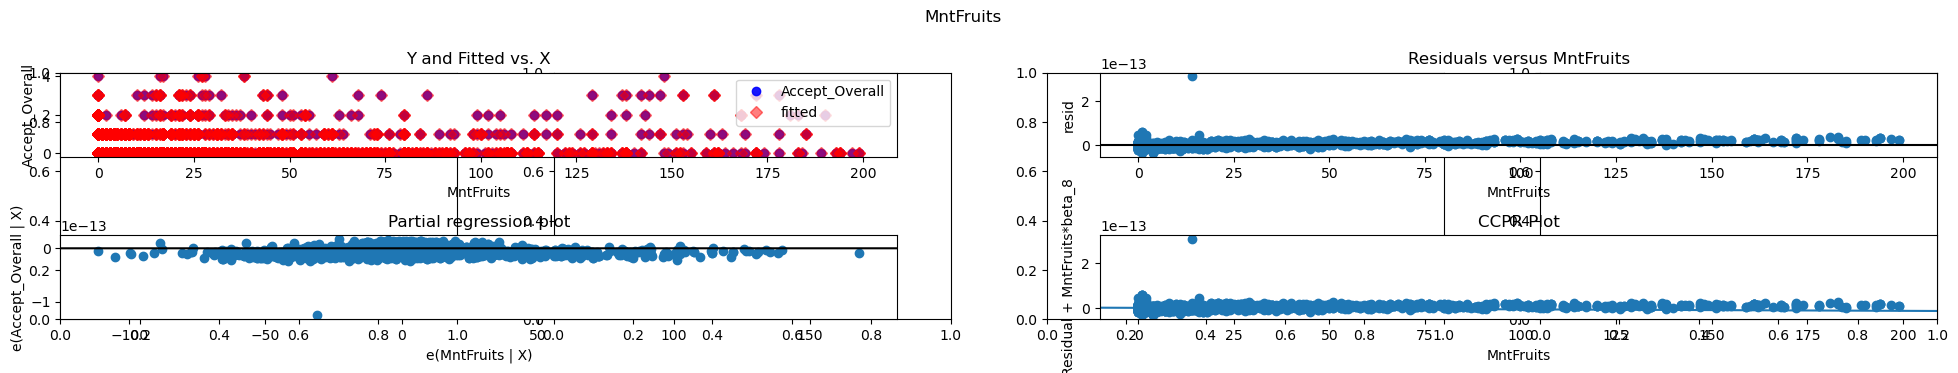

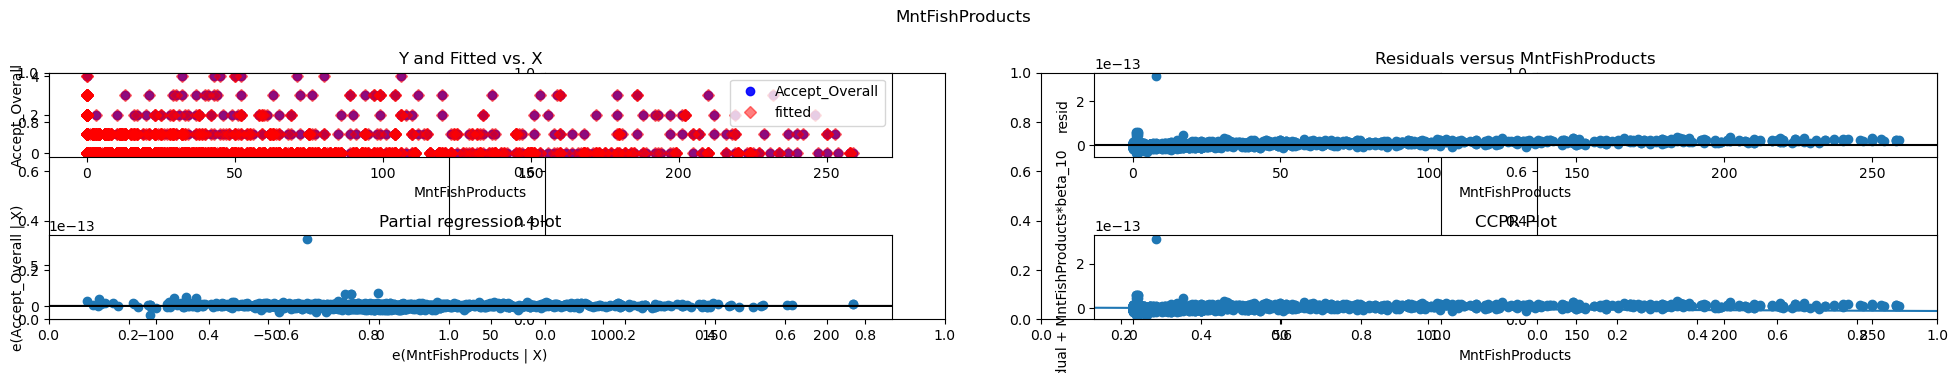

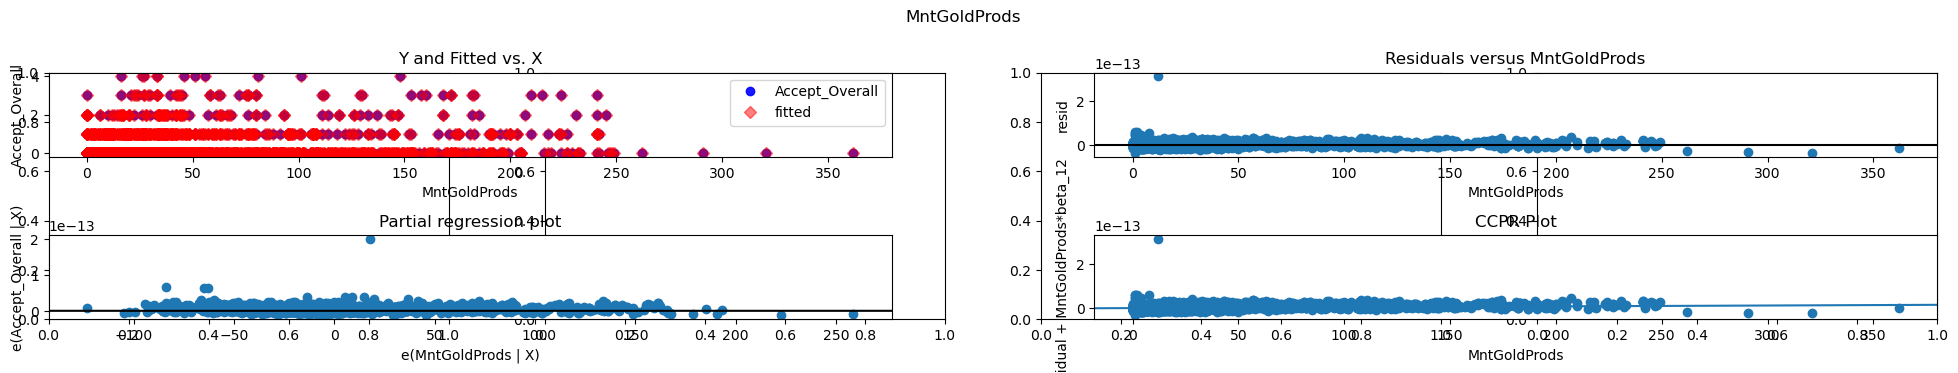

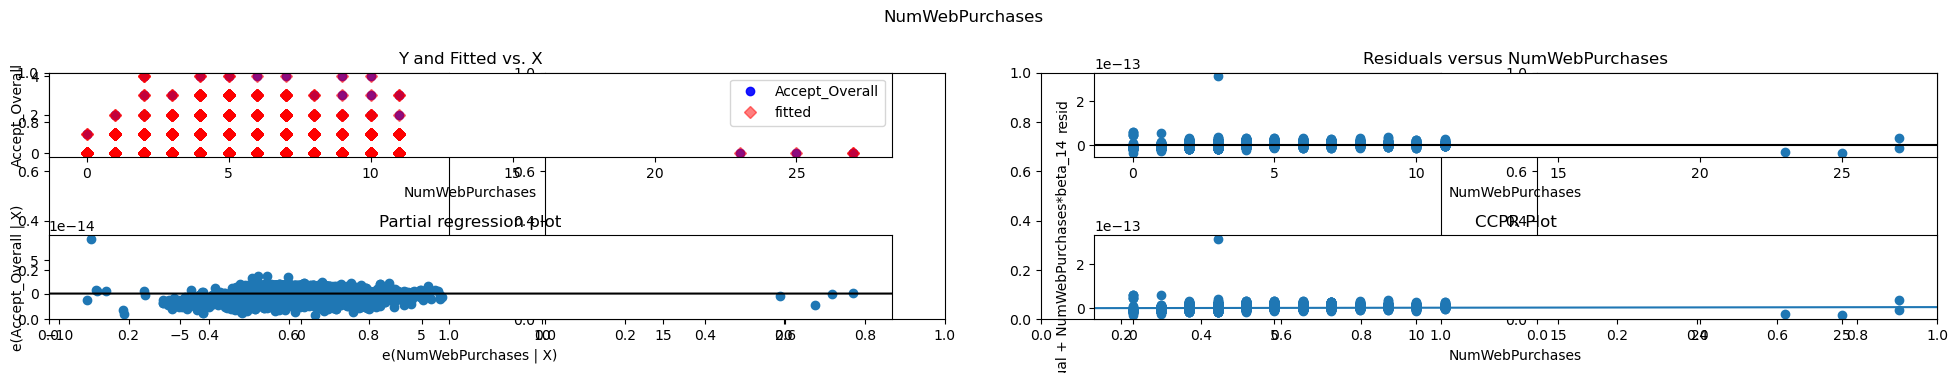

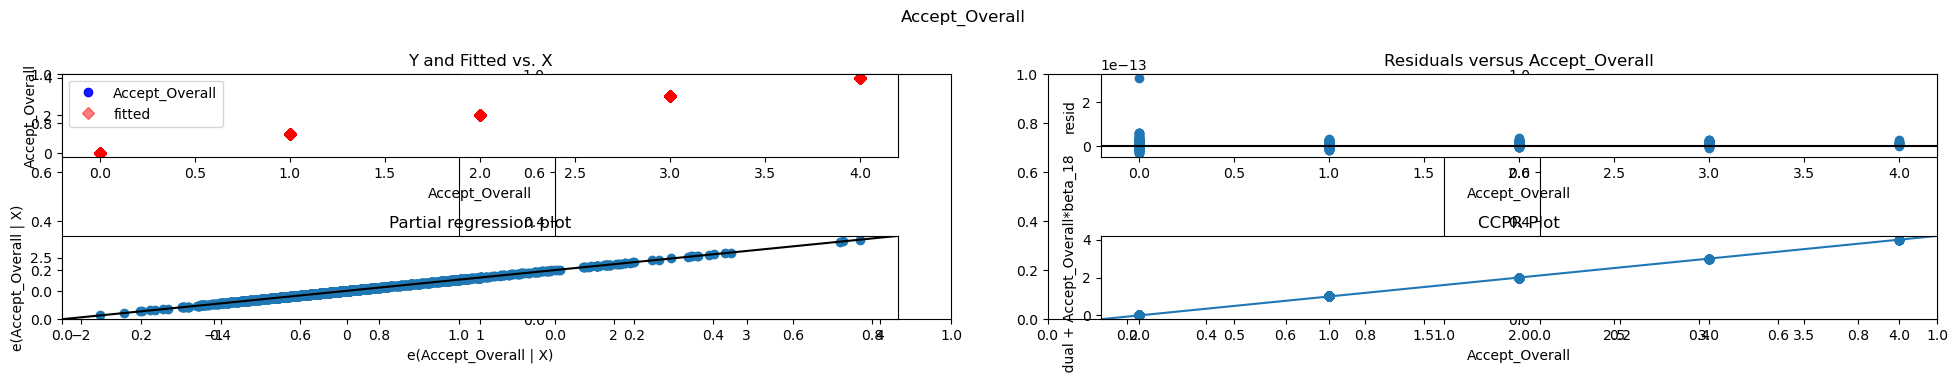

In [17]:
#Visualize the error term for variance and heteroscedasticity

import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = 'Accept_Overall ~ ' + ' + '.join(columns_to_plot)
model = smf.ols(formula=formula, data=df).fit()

for idx, column in enumerate(columns_to_plot):
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    
    # Create the 4 plots for this column
    sm.graphics.plot_regress_exog(model, column, fig=fig)
    
    # Adjust the title of the figure to be the column name
    fig.suptitle(column)
    
    plt.tight_layout()
    plt.show()

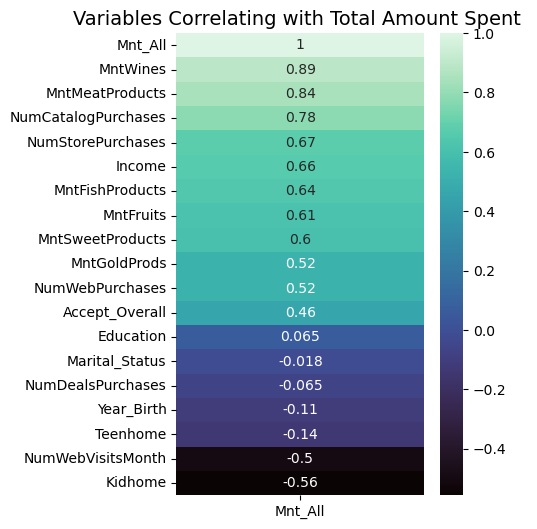

In [18]:
import seaborn as sns

price_corr = df.corr()[['Mnt_All']].sort_values(by='Mnt_All', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(price_corr, annot=True, cmap='mako')
heatmap.set_title('Variables Correlating with Total Amount Spent ', fontsize=14);

# Iteration 1 - baseline model

In [19]:
columns_OLS = [col for col in df.columns if col != 'Mnt_All']

X = df[columns_OLS]  
X = sm.add_constant(X)  
y = df['Mnt_All'] 

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mnt_All   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.651e+30
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:01:12   Log-Likelihood:                 55020.
No. Observations:                2240   AIC:                        -1.100e+05
Df Residuals:                    2221   BIC:                        -1.099e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.671e-11   2.03e-11      0.824      0.410    -2.3e-11    5.65e-11
Year_Birth          -1.332e-14   1.03e-14     -1.297      0.195   -3.35e-14    6.83e-15
Education            5.329e-14   1.39e-13      0.382      0.702    -2.2e-13    3.27e-13
Marital_Status      -1.563e-13   2.31e-13     -0.676      0.499    -6.1e-13    2.97e-13
Income               8.901e-17   6.51e-18     13.677      0.000    7.63e-17    1.02e-16
Kidhome              4.441e-14    2.8e-13      0.159      0.874   -5.04e-13    5.93e-13
Teenhome            -4.441e-15   2.56e-13     -0.017      0.986   -5.06e-13    4.97e-13
MntWines                1.0000   5.95e-16   1.68e+15      0.000       1.000       1.000
MntFruits               1.0000   3.87e-15   2.58e+14      0.000       1.000       1.000
MntMeatProducts         1.0000   8.29e-16   1.21e+15      0.000       1.000       1.000
MntFishProducts         1.0000   2.92e-15   3.42e+14      0.000       1.000       1.000
MntSweetProducts        1.0000   3.69e-15   2.71e+14      0.000       1.000       1.000
MntGoldProds            1.0000   2.61e-15   3.84e+14      0.000       1.000       1.000
NumDealsPurchases    2.753e-14   7.37e-14      0.373      0.709   -1.17e-13    1.72e-13
NumWebPurchases     -9.326e-15   5.52e-14     -0.169      0.866   -1.18e-13    9.89e-14
NumCatalogPurchases -1.954e-14   6.52e-14     -0.300      0.764   -1.47e-13    1.08e-13
NumStorePurchases    8.882e-15   5.23e-14      0.170      0.865   -9.37e-14    1.11e-13
NumWebVisitsMonth    -2.22e-14   6.88e-14     -0.323      0.747   -1.57e-13    1.13e-13
Accept_Overall       2.043e-14   1.98e-13      0.103      0.918   -3.68e-13    4.09e-13
==============================================================================
Omnibus:                     2008.106   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           382690.779
Skew:                          -3.552   Prob(JB):                         0.00
Kurtosis:                      66.638   Cond. No.                     1.06e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration 2 - model improvment

### Step 1: check multicollinearity

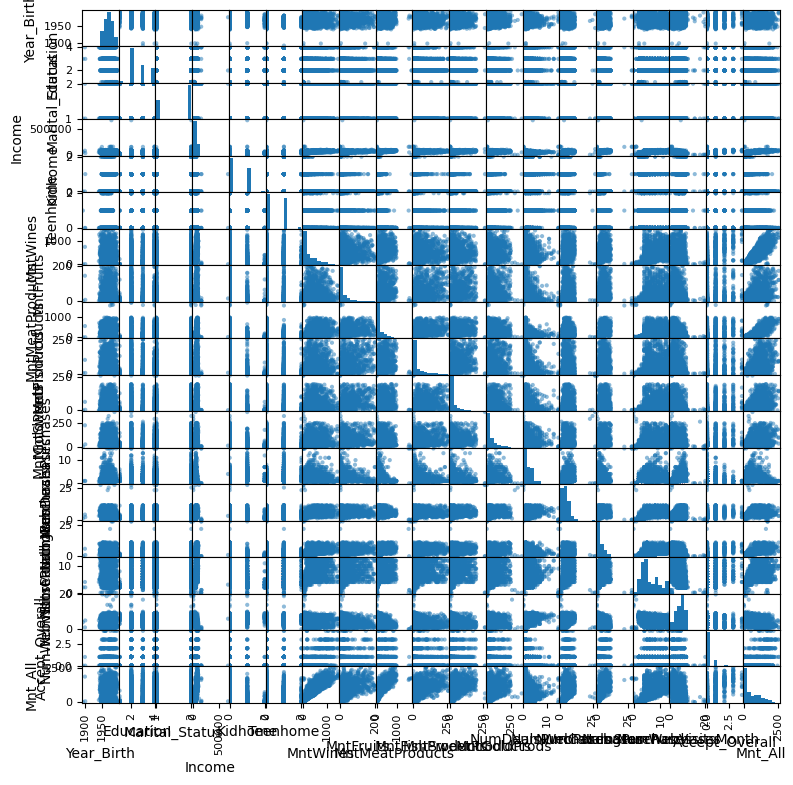

In [20]:
# Create scatter matrix for the modified dataset
pd.plotting.scatter_matrix(df, figsize=[9, 9])
plt.show()

In [21]:
df_preprocessed = df
abs(df_preprocessed.corr()) > 0.75

Year_Birth  Education  Marital_Status  Income  Kidhome  \
Year_Birth                 True      False           False   False    False   
Education                 False       True           False   False    False   
Marital_Status            False      False            True   False    False   
Income                    False      False           False    True    False   
Kidhome                   False      False           False   False     True   
Teenhome                  False      False           False   False    False   
MntWines                  False      False           False   False    False   
MntFruits                 False      False           False   False    False   
MntMeatProducts           False      False           False   False    False   
MntFishProducts           False      False           False   False    False   
MntSweetProducts          False      False           False   False    False   
MntGoldProds              False      False           False   False    False   
NumDealsPurchases         False      False           False   False    False   
NumWebPurchases           False      False           False   False    False   
NumCatalogPurchases       False      False           False   False    False   
NumStorePurchases         False      False           False   False    False   
NumWebVisitsMonth         False      False           False   False    False   
Accept_Overall            False      False           False   False    False   
Mnt_All                   False      False           False   False    False   

                     Teenhome  MntWines  MntFruits  MntMeatProducts  \
Year_Birth              False     False      False            False   
Education               False     False      False            False   
Marital_Status          False     False      False            False   
Income                  False     False      False            False   
Kidhome                 False     False      False            False   
Teenhome                 True     False      False            False   
MntWines                False      True      False            False   
MntFruits               False     False       True            False   
MntMeatProducts         False     False      False             True   
MntFishProducts         False     False      False            False   
MntSweetProducts        False     False      False            False   
MntGoldProds            False     False      False            False   
NumDealsPurchases       False     False      False            False   
NumWebPurchases         False     False      False            False   
NumCatalogPurchases     False     False      False            False   
NumStorePurchases       False     False      False            False   
NumWebVisitsMonth       False     False      False            False   
Accept_Overall          False     False      False            False   
Mnt_All                 False      True      False             True   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
Year_Birth                     False             False         False   
Education                      False             False         False   
Marital_Status                 False             False         False   
Income                         False             False         False   
Kidhome                        False             False         False   
Teenhome                       False             False         False   
MntWines                       False             False         False   
MntFruits                      False             False         False   
MntMeatProducts                False             False         False   
MntFishProducts                 True             False         False   
MntSweetProducts               False              True         False   
MntGoldProds                   False             False          True   
NumDealsPurchases              False             False         False   
NumWebPurch

In [22]:
df_corr_pairs = df_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr_pairs['pairs'] = list(zip(df_corr_pairs.level_0, df_corr_pairs.level_1))

df_corr_pairs.set_index(['pairs'], inplace = True)

df_corr_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr_pairs.columns = ['cc']

df_corr_pairs.drop_duplicates(inplace=True)

df_corr_pairs[(df_corr_pairs.cc>.75) & (df_corr_pairs.cc<1)]

cc
pairs                                   
(Mnt_All, MntWines)             0.891839
(Mnt_All, MntMeatProducts)      0.842965
(Mnt_All, NumCatalogPurchases)  0.778577

In [23]:
#
col_to_drop = ['MntWines', 'MntMeatProducts', 'NumCatalogPurchases']
df.drop(col_to_drop, axis=1, inplace=True)
df

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957          2               1  58138.0        0         0   
1           1954          2               1  46344.0        1         1   
2           1965          2               2  71613.0        0         0   
3           1984          2               2  26646.0        1         0   
4           1981          4               2  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2235        1967          2               2  61223.0        0         1   
2236        1946          4               2  64014.0        2         1   
2237        1981          2               1  56981.0        0         0   
2238        1956          3               2  69245.0        0         1   
2239        1954          4               2  52869.0        1         1   

      MntFruits  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            88              172                88            88   
1             1                2                 1             6   
2            49              111                21            42   
3             4               10                 3             5   
4            43               46                27            15   
...         ...              ...               ...           ...   
2235         43               42               118           247   
2236          0                0                 0             8   
2237         48               32                12            24   
2238         30               80                30            61   
2239          3                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumStorePurchases  \
0                     3                8                  4   
1                     2                1                  2   
2                     1                8                 10   
3                     2                2                  4   
4                     5                5                  6   
...                 ...              ...                ...   
2235                  2                9                  4   
2236                  7                8                  5   
2237                  1                2                 13   
2238                  2                6                 10   
2239                  3                3                  4   

      NumWebVisitsMonth  Accept_Overall  Mnt_All  
0                     7               0     1617  
1                     5               0       27  
2                     4               0      776  
3                     6               0       53  
4                     5               0      422  
...                 ...             ...      ...  
2235                  5               0     1341  
2236                  7               1      444  
2237                  6               1     1241  
2238                  3               0      843  
2239                  7               0      172  

[2240 rows x 16 columns]

In [24]:
columns_OLS = [col for col in df.columns if col != 'Mnt_All']

X = df[columns_OLS]  
X = sm.add_constant(X)  
y = df['Mnt_All'] 

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mnt_All   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     580.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:01:42   Log-Likelihood:                -15732.
No. Observations:                2240   AIC:                         3.150e+04
Df Residuals:                    2224   BIC:                         3.159e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1493.0983   1055.536      1.415      0.157    -576.841    3563.038
Year_Birth           -0.8572      0.535     -1.603      0.109      -1.906       0.192
Education            47.8032      7.160      6.676      0.000      33.761      61.845
Marital_Status       -6.3166     12.057     -0.524      0.600     -29.960      17.327
Income                0.0046      0.000     14.266      0.000       0.004       0.005
Kidhome            -125.5284     14.188     -8.848      0.000    -153.351     -97.705
Teenhome           -111.7893     12.859     -8.694      0.000    -137.006     -86.573
MntFruits             1.9731      0.200      9.871      0.000       1.581       2.365
MntFishProducts       1.8346      0.150     12.240      0.000       1.541       2.129
MntSweetProducts      1.2827      0.191      6.701      0.000       0.907       1.658
MntGoldProds          1.2296      0.135      9.133      0.000       0.966       1.494
NumDealsPurchases    18.6884      3.716      5.029      0.000      11.402      25.975
NumWebPurchases      21.9332      2.810      7.806      0.000      16.423      27.443
NumStorePurchases    34.2719      2.543     13.476      0.000      29.285      39.259
NumWebVisitsMonth    -8.2919      3.427     -2.420      0.016     -15.013      -1.571
Accept_Overall      193.2790      9.166     21.087      0.000     175.304     211.254
==============================================================================
Omnibus:                      394.606   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8659.906
Skew:                           0.069   Prob(JB):                         0.00
Kurtosis:                      12.631   Cond. No.                     1.06e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 2: convert categoricial data, log transformation and normalisation

In [25]:
cat_col = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Accept_Overall']
con_col = ['Year_Birth', 'Income', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Mnt_All']

### model 1 - dummies created for categoricial variables

In [26]:
for i in cat_col:
    df[i] = df[i].astype(str)

dummies = pd.get_dummies(df[cat_col], drop_first=True)  
df.drop(cat_col, axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)


In [27]:
columns_OLS = [col for col in df.columns if col != 'Mnt_All']

X = df[columns_OLS]  
X = sm.add_constant(X)  
y = df['Mnt_All'] 

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mnt_All   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:01:43   Log-Likelihood:                -15710.
No. Observations:                2240   AIC:                         3.147e+04
Df Residuals:                    2217   BIC:                         3.160e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1399.0305   1057.596      1.323      0.186    -674.952    3473.013
Year_Birth           -0.7779      0.536     -1.452      0.147      -1.829       0.273
Income                0.0046      0.000     14.222      0.000       0.004       0.005
MntFruits             1.9260      0.198      9.703      0.000       1.537       2.315
MntFishProducts       1.7958      0.149     12.049      0.000       1.503       2.088
MntSweetProducts      1.3000      0.190      6.840      0.000       0.927       1.673
MntGoldProds          1.2070      0.134      9.014      0.000       0.944       1.470
NumDealsPurchases    21.3346      3.722      5.732      0.000      14.035      28.634
NumWebPurchases      20.8222      2.799      7.438      0.000      15.332      26.312
NumStorePurchases    33.8640      2.529     13.390      0.000      28.904      38.824
NumWebVisitsMonth    -7.4308      3.406     -2.182      0.029     -14.111      -0.751
Education_2          52.5303     38.832      1.353      0.176     -23.621     128.682
Education_3          63.9824     39.602      1.616      0.106     -13.678     141.643
Education_4         154.0551     40.434      3.810      0.000      74.762     233.348
Marital_Status_2     -5.8117     11.962     -0.486      0.627     -29.269      17.645
Kidhome_1          -154.5467     16.065     -9.620      0.000    -186.052    -123.042
Kidhome_2          -145.9047     41.234     -3.538      0.000    -226.765     -65.044
Teenhome_1         -137.8258     14.231     -9.685      0.000    -165.734    -109.918
Teenhome_2         -121.2011     39.644     -3.057      0.002    -198.945     -43.457
Accept_Overall_1    207.0885     16.795     12.330      0.000     174.152     240.025
Accept_Overall_2    425.0606     31.346     13.560      0.000     363.590     486.531
Accept_Overall_3    571.2583     42.661     13.391      0.000     487.598     654.918
Accept_Overall_4    523.8583     82.712      6.334      0.000     361.657     686.060
==============================================================================
Omnibus:                      392.642   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8546.339
Skew:                           0.059   Prob(JB):                         0.00
Kurtosis:                      12.568   Cond. No.                     1.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Note:
#### Model 1 is the baseline model in iteration 2
#### The following models will be use model 1 as based model

### model  2 - log transformed

In [28]:
import numpy as np

# the data under these columns is not so normally distributed
col = ['Income', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
       'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'Mnt_All']

df1 = df.copy()

# Create a new DataFrame for log-transformed columns
df_log_transformed = df1[col].applymap(lambda x: np.log(x + 1))
df_log_transformed.columns = [f"{i}_log" for i in col]

# Drop original columns to be transformed from df
df1.drop(col, axis=1, inplace=True)

# Concatenate df (which now only has non-transformed columns) with the log-transformed columns
df_log = pd.concat([df1, df_log_transformed], axis=1)

In [29]:
columns_OLS = [col for col in df_log.columns if col != 'Mnt_All_log']

X = df_log[columns_OLS]  
X = sm.add_constant(X)  
y = df_log['Mnt_All_log'] 

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mnt_All_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1039.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:01:43   Log-Likelihood:                -1325.4
No. Observations:                2240   AIC:                             2697.
Df Residuals:                    2217   BIC:                             2828.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.0946      1.771     -2.311      0.021      -7.569      -0.621
Year_Birth               -0.0007      0.001     -0.786      0.432      -0.002       0.001
NumWebVisitsMonth        -0.0143      0.006     -2.406      0.016      -0.026      -0.003
Education_2               0.1611      0.064      2.500      0.012       0.035       0.287
Education_3               0.1796      0.066      2.729      0.006       0.051       0.309
Education_4               0.3828      0.068      5.616      0.000       0.249       0.516
Marital_Status_2          0.0085      0.019      0.436      0.663      -0.030       0.047
Kidhome_1                -0.5149      0.027    -18.999      0.000      -0.568      -0.462
Kidhome_2                -0.6192      0.068     -9.158      0.000      -0.752      -0.487
Teenhome_1               -0.2750      0.026    -10.783      0.000      -0.325      -0.225
Teenhome_2               -0.1965      0.065     -3.012      0.003      -0.324      -0.069
Accept_Overall_1          0.2657      0.028      9.629      0.000       0.212       0.320
Accept_Overall_2          0.4645      0.051      9.081      0.000       0.364       0.565
Accept_Overall_3          0.5098      0.069      7.339      0.000       0.374       0.646
Accept_Overall_4          0.5759      0.135      4.279      0.000       0.312       0.840
Income_log                0.7476      0.032     23.179      0.000       0.684       0.811
MntFruits_log             0.0611      0.010      6.419      0.000       0.042       0.080
MntFishProducts_log       0.0878      0.009      9.648      0.000       0.070       0.106
MntSweetProducts_log      0.0617      0.009      6.675      0.000       0.044       0.080
MntGoldProds_log          0.1830      0.010     17.995      0.000       0.163       0.203
NumDealsPurchases_log     0.4554      0.029     15.922      0.000       0.399       0.511
NumWebPurchases_log       0.5929      0.027     21.758      0.000       0.540       0.646
NumStorePurchases_log     0.4075      0.032     12.652      0.000       0.344       0.471
==============================================================================
Omnibus:                     1216.815   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42276.778
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                      23.926   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



### model 3 -  normalised

In [30]:
df2 = df.copy()

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

# Normalize specified columns
df_norm = df2[col].apply(normalize)

# Drop original columns in df2
df2.drop(columns=col, inplace=True)

# Concatenate df2 with the normalized columns
df_norm1 = pd.concat([df2, df_norm], axis=1)

In [31]:
columns_OLS = [col for col in df_norm1.columns if col != 'Mnt_All']

X = df_norm1[columns_OLS]  
X = sm.add_constant(X)  
y = df_norm1['Mnt_All'] 

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mnt_All   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:01:43   Log-Likelihood:                -1372.3
No. Observations:                2240   AIC:                             2791.
Df Residuals:                    2217   BIC:                             2922.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.6075      1.756      1.485      0.138      -0.836       6.051
Year_Birth           -0.0013      0.001     -1.452      0.147      -0.003       0.000
NumWebVisitsMonth    -0.0123      0.006     -2.182      0.029      -0.023      -0.001
Education_2           0.0872      0.064      1.353      0.176      -0.039       0.214
Education_3           0.1062      0.066      1.616      0.106      -0.023       0.235
Education_4           0.2558      0.067      3.810      0.000       0.124       0.387
Marital_Status_2     -0.0097      0.020     -0.486      0.627      -0.049       0.029
Kidhome_1            -0.2566      0.027     -9.620      0.000      -0.309      -0.204
Kidhome_2            -0.2423      0.068     -3.538      0.000      -0.377      -0.108
Teenhome_1           -0.2289      0.024     -9.685      0.000      -0.275      -0.183
Teenhome_2           -0.2012      0.066     -3.057      0.002      -0.330      -0.072
Accept_Overall_1      0.3439      0.028     12.330      0.000       0.289       0.399
Accept_Overall_2      0.7058      0.052     13.560      0.000       0.604       0.808
Accept_Overall_3      0.9485      0.071     13.391      0.000       0.810       1.087
Accept_Overall_4      0.8698      0.137      6.334      0.000       0.601       1.139
Income                0.1911      0.013     14.222      0.000       0.165       0.217
MntFruits             0.1272      0.013      9.703      0.000       0.101       0.153
MntFishProducts       0.1629      0.014     12.049      0.000       0.136       0.189
MntSweetProducts      0.0891      0.013      6.840      0.000       0.064       0.115
MntGoldProds          0.1046      0.012      9.014      0.000       0.082       0.127
NumDealsPurchases     0.0684      0.012      5.732      0.000       0.045       0.092
NumWebPurchases       0.0961      0.013      7.438      0.000       0.071       0.121
NumStorePurchases     0.1828      0.014     13.390      0.000       0.156       0.210
==============================================================================
Omnibus:                      392.642   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8546.339
Skew:                           0.059   Prob(JB):                         0.00
Kurtosis:                      12.568   Cond. No.                     3.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



### model 4 - log transformed and normalised

In [32]:
# Ensure the columns exist in df_log before proceeding
cols_to_normalize = [f"{i}_log" for i in col if f"{i}_log" in df_log.columns]

# Normalize specified columns
df_log_norm = df_log[cols_to_normalize].apply(normalize)

# Drop original columns in df_log
df_log.drop(columns=cols_to_normalize, inplace=True)

# Concatenate df_log with the normalized columns
df_log_norm = pd.concat([df_log, df_log_norm], axis=1)

In [33]:
columns_OLS = [col for col in df_log_norm.columns if col != 'Mnt_All_log']

X = df_log_norm[columns_OLS]  
X = sm.add_constant(X)  
y = df_log_norm['Mnt_All_log'] 

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mnt_All_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1039.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:01:43   Log-Likelihood:                -461.60
No. Observations:                2240   AIC:                             969.2
Df Residuals:                    2217   BIC:                             1101.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.0162      1.172      0.867      0.386      -1.282       3.315
Year_Birth               -0.0005      0.001     -0.786      0.432      -0.002       0.001
NumWebVisitsMonth        -0.0097      0.004     -2.406      0.016      -0.018      -0.002
Education_2               0.1096      0.044      2.500      0.012       0.024       0.195
Education_3               0.1221      0.045      2.729      0.006       0.034       0.210
Education_4               0.2603      0.046      5.616      0.000       0.169       0.351
Marital_Status_2          0.0058      0.013      0.436      0.663      -0.020       0.032
Kidhome_1                -0.3502      0.018    -18.999      0.000      -0.386      -0.314
Kidhome_2                -0.4211      0.046     -9.158      0.000      -0.511      -0.331
Teenhome_1               -0.1870      0.017    -10.783      0.000      -0.221      -0.153
Teenhome_2               -0.1336      0.044     -3.012      0.003      -0.221      -0.047
Accept_Overall_1          0.1807      0.019      9.629      0.000       0.144       0.217
Accept_Overall_2          0.3159      0.035      9.081      0.000       0.248       0.384
Accept_Overall_3          0.3467      0.047      7.339      0.000       0.254       0.439
Accept_Overall_4          0.3916      0.092      4.279      0.000       0.212       0.571
Income_log                0.2558      0.011     23.179      0.000       0.234       0.277
MntFruits_log             0.0652      0.010      6.419      0.000       0.045       0.085
MntFishProducts_log       0.0989      0.010      9.648      0.000       0.079       0.119
MntSweetProducts_log      0.0669      0.010      6.675      0.000       0.047       0.087
MntGoldProds_log          0.1603      0.009     17.995      0.000       0.143       0.178
NumDealsPurchases_log     0.1459      0.009     15.922      0.000       0.128       0.164
NumWebPurchases_log       0.2265      0.010     21.758      0.000       0.206       0.247
NumStorePurchases_log     0.1349      0.011     12.652      0.000       0.114       0.156
==============================================================================
Omnibus:                     1216.815   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42276.778
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                      23.926   Cond. No.                     3.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Note: 
All models have great R-squared value, suggesting they all perform well. 

Model 1 
1. AIC:3.150e+04 and BIC: 3.159e+04, very high number, means the model fits the data less well
2. Condtion number: 1.06e+07, , very high number,

Model 2 - log transformed
1. AIC and BIC number decrease signficantly (2769/2828) - fits the data better
2. R-squared increase to 0.911, the highest number among the 3 models - best  performance
3. Jarque-Bera (JB): 42276.778 increase significantly - data's the skewness and kurtosis does not match a normal distribution 
4. Condtion number: 3.76e+05, a minor decrease - similar to model 1

Model 3 - normalised
1. Similar to model 1 but the AIC/BIC number decrease signficantly to 2,791 and 2,922
2. Record the lowest condition number among all models 3.65e+05

Model 4 - log transformed and normalised
1. Similar to model 2 with the highest R-squared, but also have the lowest AIC/BIC number: 969.2/1101 and the lowest condition number: 3.65e+05 - fits the data best

Based on the figures, model 4 performs the best, next step will have a look at the performance in data validation to check its real predition capability.



## Iteration 3 - data validation

### model 4  - data validation

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

columns_OLS = [col for col in df_log_norm.columns if col != 'Mnt_All_log']

X = df_log_norm[columns_OLS]  
X = sm.add_constant(X)  
y = df_log_norm['Mnt_All_log'] 

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5) 
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.87822862 0.90704913 0.91907228 0.92715606 0.90002264]
Average cross-validation score: 0.9063057434983106


In [38]:
cross_validate(model, X, y, cv=10)
cross_val_results = cross_validate(model, X, y, scoring="neg_mean_squared_error", return_train_score=True)

# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

print(train_avg, test_avg)

0.08781186254074402 0.09402477698313871


### Note: 

Model 4 has a great result in both test. 



## Iteration 4 - removing high p-value variables



In [39]:
# use model 4 df_log_norm as baseline model in iteration 4

columns_OLS = [col for col in df_log_norm.columns if col != 'Mnt_All_log']

X = df_log_norm[columns_OLS]  
X = sm.add_constant(X)  
y = df_log_norm['Mnt_All_log'] 

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mnt_All_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1039.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:03:48   Log-Likelihood:                -461.60
No. Observations:                2240   AIC:                             969.2
Df Residuals:                    2217   BIC:                             1101.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.0162      1.172      0.867      0.386      -1.282       3.315
Year_Birth               -0.0005      0.001     -0.786      0.432      -0.002       0.001
NumWebVisitsMonth        -0.0097      0.004     -2.406      0.016      -0.018      -0.002
Education_2               0.1096      0.044      2.500      0.012       0.024       0.195
Education_3               0.1221      0.045      2.729      0.006       0.034       0.210
Education_4               0.2603      0.046      5.616      0.000       0.169       0.351
Marital_Status_2          0.0058      0.013      0.436      0.663      -0.020       0.032
Kidhome_1                -0.3502      0.018    -18.999      0.000      -0.386      -0.314
Kidhome_2                -0.4211      0.046     -9.158      0.000      -0.511      -0.331
Teenhome_1               -0.1870      0.017    -10.783      0.000      -0.221      -0.153
Teenhome_2               -0.1336      0.044     -3.012      0.003      -0.221      -0.047
Accept_Overall_1          0.1807      0.019      9.629      0.000       0.144       0.217
Accept_Overall_2          0.3159      0.035      9.081      0.000       0.248       0.384
Accept_Overall_3          0.3467      0.047      7.339      0.000       0.254       0.439
Accept_Overall_4          0.3916      0.092      4.279      0.000       0.212       0.571
Income_log                0.2558      0.011     23.179      0.000       0.234       0.277
MntFruits_log             0.0652      0.010      6.419      0.000       0.045       0.085
MntFishProducts_log       0.0989      0.010      9.648      0.000       0.079       0.119
MntSweetProducts_log      0.0669      0.010      6.675      0.000       0.047       0.087
MntGoldProds_log          0.1603      0.009     17.995      0.000       0.143       0.178
NumDealsPurchases_log     0.1459      0.009     15.922      0.000       0.128       0.164
NumWebPurchases_log       0.2265      0.010     21.758      0.000       0.206       0.247
NumStorePurchases_log     0.1349      0.011     12.652      0.000       0.114       0.156
==============================================================================
Omnibus:                     1216.815   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42276.778
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                      23.926   Cond. No.                     3.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# make a copy of the data frame
df_i4a = df_log_norm.copy()

# remove the highest p-value variables
col_to_drop = ['Year_Birth', 'Marital_Status_2']
df_i4a.drop(col_to_drop, axis=1, inplace=True)

In [41]:
columns_OLS = [col for col in df_i4a.columns if col != 'Mnt_All_log']

X = df_i4a[columns_OLS]  
X = sm.add_constant(X)  
y = df_i4a['Mnt_All_log'] 

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mnt_All_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1143.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:03:53   Log-Likelihood:                -462.00
No. Observations:                2240   AIC:                             966.0
Df Residuals:                    2219   BIC:                             1086.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0998      0.049      2.045      0.041       0.004       0.195
NumWebVisitsMonth        -0.0099      0.004     -2.454      0.014      -0.018      -0.002
Education_2               0.1103      0.044      2.519      0.012       0.024       0.196
Education_3               0.1235      0.045      2.762      0.006       0.036       0.211
Education_4               0.2619      0.046      5.660      0.000       0.171       0.353
Kidhome_1                -0.3525      0.018    -19.426      0.000      -0.388      -0.317
Kidhome_2                -0.4218      0.046     -9.180      0.000      -0.512      -0.332
Teenhome_1               -0.1834      0.017    -10.955      0.000      -0.216      -0.151
Teenhome_2               -0.1287      0.044     -2.930      0.003      -0.215      -0.043
Accept_Overall_1          0.1811      0.019      9.660      0.000       0.144       0.218
Accept_Overall_2          0.3152      0.035      9.067      0.000       0.247       0.383
Accept_Overall_3          0.3460      0.047      7.330      0.000       0.253       0.439
Accept_Overall_4          0.3904      0.091      4.268      0.000       0.211       0.570
Income_log                0.2564      0.011     23.282      0.000       0.235       0.278
MntFruits_log             0.0651      0.010      6.412      0.000       0.045       0.085
MntFishProducts_log       0.0991      0.010      9.678      0.000       0.079       0.119
MntSweetProducts_log      0.0665      0.010      6.650      0.000       0.047       0.086
MntGoldProds_log          0.1600      0.009     17.984      0.000       0.143       0.177
NumDealsPurchases_log     0.1460      0.009     15.932      0.000       0.128       0.164
NumWebPurchases_log       0.2269      0.010     21.808      0.000       0.206       0.247
NumStorePurchases_log     0.1345      0.011     12.645      0.000       0.114       0.155
==============================================================================
Omnibus:                     1216.089   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42284.254
Skew:                           1.939   Prob(JB):                         0.00
Kurtosis:                      23.928   Cond. No.                         87.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

columns_OLS = [col for col in df_log_norm.columns if col != 'Mnt_All_log']

X = df_log_norm[columns_OLS]  
X = sm.add_constant(X)  
y = df_log_norm['Mnt_All_log'] 

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5) 
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.87822862 0.90704913 0.91907228 0.92715606 0.90002264]
Average cross-validation score: 0.9063057434983106


In [50]:
cross_validate(model, X, y, cv=10)
cross_val_results = cross_validate(model, X, y, scoring="neg_mean_squared_error", return_train_score=True)

# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

print(train_avg, test_avg)

0.08781186254074402 0.09402477698313871


In [42]:
import statsmodels.api as sm
coef = model.params
for variable, coefficient in coef.items():
    if variable != 'const':
        print(f'{variable}: {coefficient}')

NumWebVisitsMonth: -0.009883484007699866
Education_2: 0.11033434676318736
Education_3: 0.12351116117477696
Education_4: 0.26193069384837897
Kidhome_1: -0.35254312852716024
Kidhome_2: -0.42175356498682937
Teenhome_1: -0.1833905683477381
Teenhome_2: -0.12874486974562666
Accept_Overall_1: 0.18112902795267044
Accept_Overall_2: 0.31517963331405535
Accept_Overall_3: 0.345974894065052
Accept_Overall_4: 0.3904176281885807
Income_log: 0.25636242530515096
MntFruits_log: 0.06511935962021026
MntFishProducts_log: 0.09914953854863258
MntSweetProducts_log: 0.06650358111849382
MntGoldProds_log: 0.15996432022344176
NumDealsPurchases_log: 0.1459867213565072
NumWebPurchases_log: 0.22687010599335444
NumStorePurchases_log: 0.1345250917555456


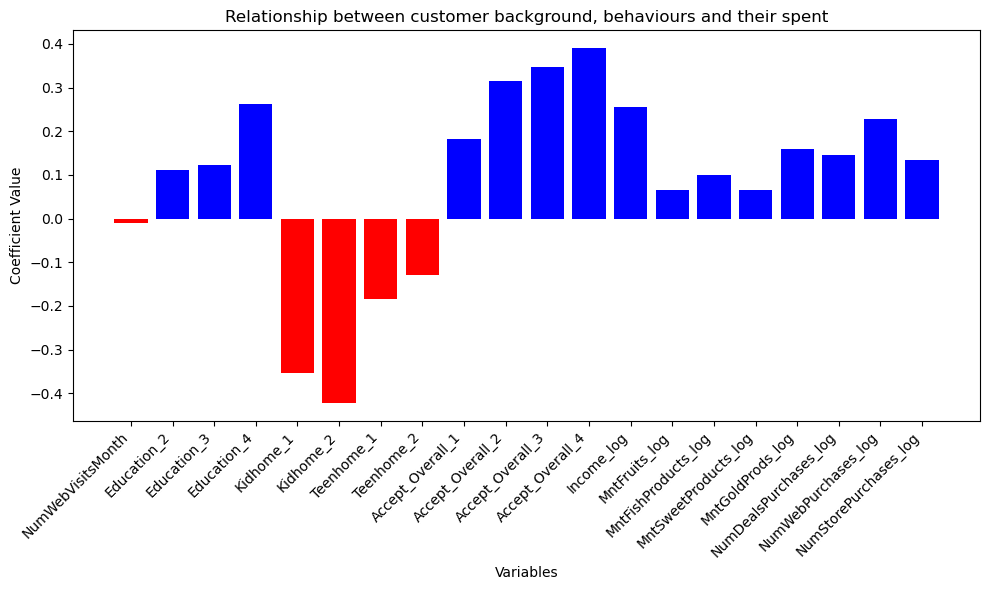

In [44]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ... your model and coefficient extraction code ...

variables = []
coefficients = []

for variable, coefficient in coef.items():
    if variable != 'const':
        variables.append(variable)
        coefficients.append(coefficient)

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(variables, coefficients, color=['blue' if coef >= 0 else 'red' for coef in coefficients])
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.title('Relationship between customer background, behaviours and their spent')
plt.xticks(rotation=45, ha='right')  # Rotate variable names for better readability
plt.tight_layout()

plt.show()


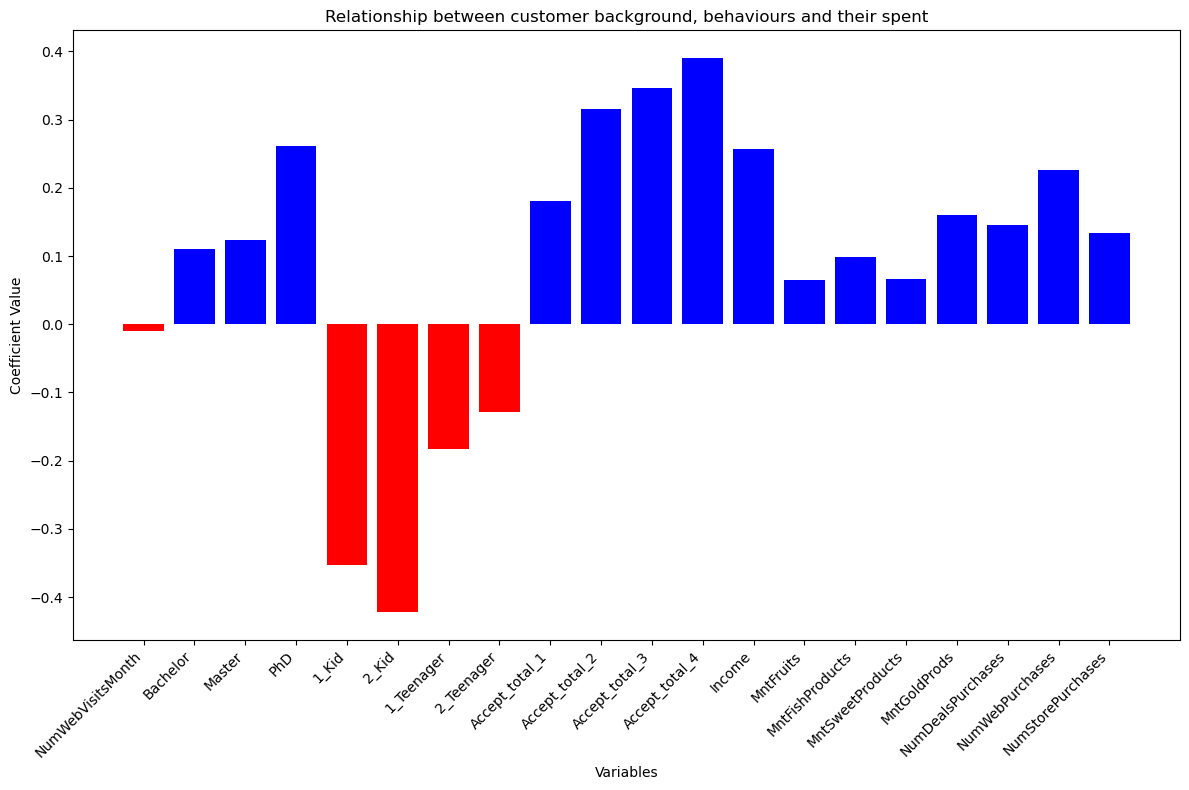

In [48]:
import matplotlib.pyplot as plt

# 你给出的字典
data_dict = {
    "NumWebVisitsMonth": -0.009883484007699866,
    "Bachelor": 0.11033434676318736,
    "Master": 0.12351116117477696,
    "PhD": 0.26193069384837897,
    "1_Kid": -0.35254312852716024,
    "2_Kid": -0.42175356498682937,
    "1_Teenager": -0.1833905683477381,
    "2_Teenager": -0.12874486974562666,
    "Accept_total_1": 0.18112902795267044,
    "Accept_total_2": 0.31517963331405535,
    "Accept_total_3": 0.345974894065052,
    "Accept_total_4": 0.3904176281885807,
    "Income": 0.25636242530515096,
    "MntFruits": 0.06511935962021026,
    "MntFishProducts": 0.09914953854863258,
    "MntSweetProducts": 0.06650358111849382,
    "MntGoldProds": 0.15996432022344176,
    "NumDealsPurchases": 0.1459867213565072,
    "NumWebPurchases": 0.22687010599335444,
    "NumStorePurchases": 0.1345250917555456
}

variables = list(data_dict.keys())
coefficients = list(data_dict.values())

# 创建柱状图
plt.figure(figsize=(12, 8))
plt.bar(variables, coefficients, color=['blue' if coef >= 0 else 'red' for coef in coefficients])
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.title('Relationship between customer background, behaviours and their spent')
plt.xticks(rotation=45, ha='right')  # Rotate variable names for better readability
plt.tight_layout()

plt.show()


### Note: 

Comparing with iteration 3, the model in interation 4 has the changes below:
* Jarque-Bera, AIC/BIC number has a minor decrease
* Condition number decrease significantly - reduce the multicollinearity



## Analysis


1. Higher levels of education correlate with increased expenditure. Similarly, higher income also corresponds to greater spending. The underlying relationship could be that those with a higher level of education are more likely to secure a high income, and because of this heightened income, consumers are more inclined to spend.
*******

2. The p-values of variable related to marital status is  greater than 0.05, suggesting that marital status does not have a significant impact on spending. Interestingly, whether a consumer has children appears to influence expenditure more discernibly. Specifically, consumers with children tend to spend less, and this expenditure continues to diminish as the age of the child increases.
*******

3. Previous promotional activities demonstrate that consumers who have accepted offers multiple times tend to spend more, validating the effectiveness of past offers. Specifically, there's little variation in the spending of those who accepted offers 2-3 times, but those accepting offers 4 times spend the most. A possible explanation is that accepting 4 offers is an indicator of loyal consumers who have a preference for our products.
*******

4. Consumers who shop online tend to spend more than those who shop in physical stores. However, those who frequently visit the website end up spending less. The underlying reason could be that making purchases online offers more convenience, but frequent website visitors might be comparing prices and might not possess a strong intention to buy.
*******

5. Based on the coefficient parameters, income, educational level, times of offer accpetance and the online shopping channel are the most influential postive factors.
*******

From this, we can profile the consumers with the highest expenditure: 

#### They are highly educated, have a high income, do not have children, prefer online shopping, and have a high acceptance rate of previous offers. The marketing team, when advertising, can target this specific demographic more intensively.




In [51]:
df.describe()

Year_Birth         Income    MntFruits  MntFishProducts  \
count  2240.000000    2240.000000  2240.000000      2240.000000   
mean   1968.805804   52237.975446    26.302232        37.525446   
std      11.984069   25037.955891    39.773434        54.628979   
min    1893.000000    1730.000000     0.000000         0.000000   
25%    1959.000000   35538.750000     1.000000         3.000000   
50%    1970.000000   51381.500000     8.000000        12.000000   
75%    1977.000000   68289.750000    33.000000        50.000000   
max    1996.000000  666666.000000   199.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
std           41.280498     52.167439           1.932238         2.778714   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumStorePurchases  NumWebVisitsMonth  ...  Education_4  \
count        2240.000000        2240.000000  ...  2240.000000   
mean            5.790179           5.316518  ...     0.216964   
std             3.250958           2.426645  ...     0.412270   
min             0.000000           0.000000  ...     0.000000   
25%             3.000000           3.000000  ...     0.000000   
50%             5.000000           6.000000  ...     0.000000   
75%             8.000000           7.000000  ...     0.000000   
max            13.000000          20.000000  ...     1.000000   

       Marital_Status_2    Kidhome_1    Kidhome_2   Teenhome_1   Teenhome_2  \
count       2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean           0.644643     0.401339     0.021429     0.459821     0.023214   
std            0.478728     0.490279     0.144840     0.498494     0.150617   
min            0.000000     0.000000     0.000000     0.000000     0.000000   
25%            0.000000     0.000000     0.000000     0.000000     0.000000   
50%            1.000000     0.000000     0.000000     0.000000     0.000000   
75%            1.000000     1.000000     0.000000     1.000000     0.000000   
max            1.000000     1.000000     1.000000     1.000000     1.000000   

       Accept_Overall_1  Accept_Overall_2  Accept_Overall_3  Accept_Overall_4  
count       2240.000000       2240.000000       2240.000000       2240.000000  
mean           0.145089          0.037054          0.019643          0.004911  
std            0.352269          0.188935          0.138801          0.069920  
min            0.000000          0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000          0.000000  
50%            0.000000          0.000000          0.000000          0.000000  
75%            0.000000          0.000000          0.000000          0.000000  
max            1.000000          1.000000          1.000000          1.000000  

[8 rows x 23 columns]

In [52]:
import sqlite3
import pandas as pd

# Sample dataset setup
df_sql = pd.read_csv('ml_project1_data.csv')

conn = sqlite3.connect(':memory:')
df_sql.to_sql('my_table', conn, index=False)

query = """
WITH Summation AS (
    SELECT 
        SUM(MntWines) as MntWines,
        SUM(MntFruits) as MntFruits,
        SUM(MntMeatProducts) as MntMeatProducts,
        SUM(MntFishProducts) as MntFishProducts,
        SUM(MntSweetProducts) as MntSweetProducts,
        SUM(MntGoldProds) as MntGoldProds,
        SUM(MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds) as MntAll
    FROM my_table
    WHERE Education IN ('PhD', 'Master', '2n Cycle')
        AND Income >= 68289.75 
        AND Kidhome = 0
        AND Teenhome = 0
)

SELECT
    'MntWines' AS Category, MntWines AS Amount, CAST(MntWines AS FLOAT) / MntAll * 100 AS Percentage
FROM Summation
UNION ALL

SELECT
    'MntFruits' AS Category, MntFruits AS Amount, CAST(MntFruits AS FLOAT) / MntAll * 100 AS Percentage
FROM Summation
UNION ALL

SELECT
    'MntMeatProducts' AS Category, MntMeatProducts AS Amount, CAST(MntMeatProducts AS FLOAT) / MntAll * 100 AS Percentage
FROM Summation
UNION ALL

SELECT
    'MntFishProducts' AS Category, MntFishProducts AS Amount, CAST(MntFishProducts AS FLOAT) / MntAll * 100 AS Percentage
FROM Summation
UNION ALL

SELECT
    'MntSweetProducts' AS Category, MntSweetProducts AS Amount, CAST(MntSweetProducts AS FLOAT) / MntAll * 100 AS Percentage
FROM Summation
UNION ALL

SELECT
    'MntGoldProds' AS Category, MntGoldProds AS Amount, CAST(MntGoldProds AS FLOAT) / MntAll * 100 AS Percentage
FROM Summation
UNION ALL

SELECT
    'MntAll' AS Category, MntAll AS Value, 100 AS Percentage
FROM Summation
"""

result = pd.read_sql(query, conn)


# Convert Percentage to string with '%' symbol
result['Percentage'] = result['Percentage'].apply(lambda x: f"{x:.2f}%")

result


Category  Amount Percentage
0          MntWines  132051     49.09%
1         MntFruits   10369      3.85%
2   MntMeatProducts   90026     33.46%
3   MntFishProducts   14529      5.40%
4  MntSweetProducts   11513      4.28%
5      MntGoldProds   10533      3.92%
6            MntAll  269021    100.00%

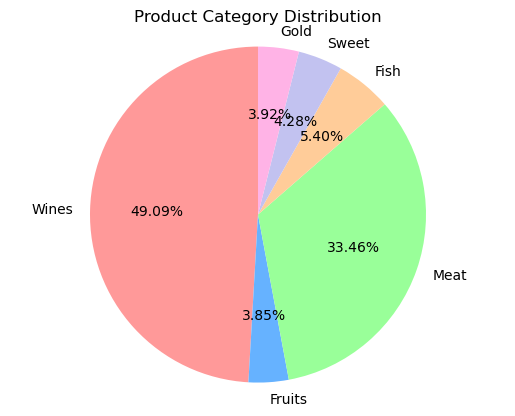

In [55]:
import matplotlib.pyplot as plt

# 数据
labels = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
sizes = [49.09, 3.85, 33.46, 5.40, 4.28, 3.92]
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6']

# 绘制饼图
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.2f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Product Category Distribution")
plt.show()


### Analysis

Wines and meat, account the 82.55% in total gross sales, are the best-selling products for the customers spending most on our company. We suggest include the product from these two categories as following promotion content.

If we can have more details in each category, maybe we can find out the specific products and make a combination offer to help increase the sales (e.g. Dinner pakcage for your steak night, including a M9 steak and a bottle of selected wine).

The fishproduct sales is low while wine sales is high, maybe we can also have a seafood combination offer to increase fish sales by leveraging the wine's strong sales (Dinner pakcage for your seafood night, including a fish and a bottle of white wine).

Applying the same idea, we might also have a offer that add $1 to get fruit/sweet when people buy a meat/wine, to help increase the sales of the categories with a low percentage.


In [53]:
query = """
SELECT 
        AVG(MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds) as AvgMntAll
    FROM my_table
    WHERE Education IN ('PhD', 'Master', '2n Cycle')
        AND Income >= 68289.75 
        AND Kidhome = 0
        AND Teenhome = 0
"""

result = pd.read_sql(query, conn)
avg_mntall = result['AvgMntAll'].iloc[0]
print(f"Average of MntAll for specified conditions: {avg_mntall}")


Average of MntAll for specified conditions: 1486.3038674033148


In [54]:
# the data records the spent in 2 years, divided by 24 (months) to get the average spent for each month 
Monthly_avg_spend = 1486 / 24
Monthly_avg_spend

61.916666666666664

### Analysis

the monthly average spent in the last 2 years is around 62 dollars, we might need to consider an offer to the key customers when their next spent is close to $62 to encourage them to spend a bit more.

The offer can be:
1. spend 77 dollars to get 10 dollars cash back
2. any amount of spent over 77 dollars will get double rewards points